<a href="https://colab.research.google.com/github/mh2888387/ippo-data-analysis-ML-project/blob/main/ipp_waste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.font_manager as fm
import arabic_reshaper
from bidi.algorithm import get_display

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


def has_arabic(text):
    return bool(re.search(r"[؀-ۿ]", str(text)))


def fix_arabic(text):
    text = str(text)
    if not has_arabic(text):
        return text
    return get_display(arabic_reshaper.reshape(text))


def fix_arabic_list(values):
    return [fix_arabic(v) for v in values]


def set_arabic_font():
    arabic_fonts = [
        "Noto Naskh Arabic",
        "Noto Sans Arabic",
        "Amiri",
        "Arial",
        "Tahoma",
        "DejaVu Sans",
    ]
    available_fonts = {f.name for f in fm.fontManager.ttflist}
    for font_name in arabic_fonts:
        if font_name in available_fonts:
            plt.rcParams["font.family"] = font_name
            break
    plt.rcParams["axes.unicode_minus"] = False


set_arabic_font()


In [ ]:
DATASET_ROOT = "/content/تقرير يومي عن انتاجيه  الجوده شهر يوليو_cleaned.xlsx"


In [ ]:
df = pd.read_excel(DATASET_ROOT,header=None)
df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...
1,ملاحظات,نسبة,الهالك,اجمالي,الانتاج بالرول,الانتاج بالرول,الانتاج بالرول,السمك,المقاس,اسم,الاوردر,اســم,مسئول,خط الانتاج,الورديه,التاريخ
2,ملاحظات,الهالك,بالكيلو,الوزن,فرز تاني,محلي,تصدير,السمك,المقاس,العميل,الاوردر,الفني,الجوده,خط الانتاج,الورديه,التاريخ
3,فرقعة البالونة اكثر من مرة,NaN,بالكيلو,3470,فرز تاني,محلي,1,19,260,تصدير فلسطين,1086,عمرو ابو العلا,ابراهيم حامد,خط1 الصيني,الاولي,2025-01-07 00:00:00
4,فرقعة البالونة اكثر من مرة,NaN,بالكيلو,3470,فرز تاني,محلي,2,19,250,تصدير فلسطين,1086,عمرو ابو العلا,ابراهيم حامد,خط1 الصيني,الاولي,2025-01-07 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,لم يتم وزن الانتاج من قبل الفنى,0.049801,100,1908,1,94,18,19,45,محلي,2007,احمد شعبان,محمد الجوهري,تناية2,الثانيه,31/7/2025
863,لم يتم وزن الانتاج من قبل الفنى,0.050775,95,1776,1,94,50,15,55,تركيا MF832,1092,احمد راضى,محمد الجوهري,تناية4,الثانيه,31/7/2025
864,لم يتم وزن الانتاج من قبل الفنى,0.050775,95,1776,1,3,29,15,50,تركيا MF832,1092,احمد راضى,محمد الجوهري,تناية4,الثانيه,31/7/2025
865,لم يتم وزن الانتاج من قبل الفنى,0.050775,95,1776,1,3,12,15,40,تركيا MF832,1092,احمد راضى,محمد الجوهري,تناية4,الثانيه,31/7/2025


In [ ]:
# df.columns = df.iloc[header_row_index]

# # Remove all rows above the header
# df = df[(header_row_index + 1):]

# # Reset index
# df = df.reset_index(drop=True)

# # Optional: remove column name index label
# df.columns.name = None

# # Show result
# print(df.head())

In [ ]:
df=df.drop(columns=[0,1,9,15])
df

,2,3,4,5,6,7,8,10,11,12,13,14
0,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...
1,الهالك,اجمالي,الانتاج بالرول,الانتاج بالرول,الانتاج بالرول,السمك,المقاس,الاوردر,اســم,مسئول,خط الانتاج,الورديه
2,بالكيلو,الوزن,فرز تاني,محلي,تصدير,السمك,المقاس,الاوردر,الفني,الجوده,خط الانتاج,الورديه
3,بالكيلو,3470,فرز تاني,محلي,1,19,260,1086,عمرو ابو العلا,ابراهيم حامد,خط1 الصيني,الاولي
4,بالكيلو,3470,فرز تاني,محلي,2,19,250,1086,عمرو ابو العلا,ابراهيم حامد,خط1 الصيني,الاولي
...,...,...,...,...,...,...,...,...,...,...,...,...
862,100,1908,1,94,18,19,45,2007,احمد شعبان,محمد الجوهري,تناية2,الثانيه
863,95,1776,1,94,50,15,55,1092,احمد راضى,محمد الجوهري,تناية4,الثانيه
864,95,1776,1,3,29,15,50,1092,احمد راضى,محمد الجوهري,تناية4,الثانيه
865,95,1776,1,3,12,15,40,1092,احمد راضى,محمد الجوهري,تناية4,الثانيه


In [ ]:
df_columns = df.iloc[2]
df_columns

,2
2,بالكيلو
3,الوزن
4,فرز تاني
5,محلي
6,تصدير
7,السمك
8,المقاس
10,الاوردر
11,الفني
12,الجوده


In [ ]:
df.columns = df_columns.loc[1:]
df

2,بالكيلو,الوزن,فرز تاني,محلي,تصدير,السمك,المقاس,الاوردر,الفني,الجوده,خط الانتاج,الورديه
0,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...,تـــــقــــريــــر الـــــجـــــوده الــــــيـ...
1,الهالك,اجمالي,الانتاج بالرول,الانتاج بالرول,الانتاج بالرول,السمك,المقاس,الاوردر,اســم,مسئول,خط الانتاج,الورديه
2,بالكيلو,الوزن,فرز تاني,محلي,تصدير,السمك,المقاس,الاوردر,الفني,الجوده,خط الانتاج,الورديه
3,بالكيلو,3470,فرز تاني,محلي,1,19,260,1086,عمرو ابو العلا,ابراهيم حامد,خط1 الصيني,الاولي
4,بالكيلو,3470,فرز تاني,محلي,2,19,250,1086,عمرو ابو العلا,ابراهيم حامد,خط1 الصيني,الاولي
...,...,...,...,...,...,...,...,...,...,...,...,...
862,100,1908,1,94,18,19,45,2007,احمد شعبان,محمد الجوهري,تناية2,الثانيه
863,95,1776,1,94,50,15,55,1092,احمد راضى,محمد الجوهري,تناية4,الثانيه
864,95,1776,1,3,29,15,50,1092,احمد راضى,محمد الجوهري,تناية4,الثانيه
865,95,1776,1,3,12,15,40,1092,احمد راضى,محمد الجوهري,تناية4,الثانيه


In [ ]:
df_cleaned=df.drop(df.index[0:27])
# df.columns = df.iloc[1]

# # Drop the first row from data
# df = df.drop(df.index[0])

# # Reset index
# df = df.reset_index(drop=True)
# df.drop(df.columns[0], axis=1, inplace=True)


In [ ]:
df_cleaned.head(20)

2,بالكيلو,الوزن,فرز تاني,محلي,تصدير,السمك,المقاس,الاوردر,الفني,الجوده,خط الانتاج,الورديه
27,110,2167.4,2,38,8,25,55,1084,احمد راضى,محمد الجوهرى,تناية4,الثانيه
28,110,2167.4,2,30,8,25,43,1084,احمد راضى,محمد الجوهرى,تناية4,الثانيه
29,110,2905,2,4,8,25,43,محلى,محمود الاشمونى,محمد الجوهرى,الخرازة,الثانيه
30,20,4410,2,8,8,15,255,1086,عمرو ابو العلا,ابراهيم حامد,خط1 الصيني,الاولي
31,20,4410,2,3,8,غير معلوم,255,1086,عمرو ابو العلا,ابراهيم حامد,خط2 الصيني,الاولي
32,130,2192,2,5,8,25,90,1084,محمود جمال/ محمد السيد,طارق سيد,سليتر1,الاولي
33,130,2192,2,5,8,25,60,1084,محمود جمال/ محمد السيد,طارق سيد,سليتر1,الاولي
34,130,2192,2,5,8,25,85,1084,محمود جمال/ محمد السيد,طارق سيد,سليتر1,الاولي
35,85,913.1,2,44,8,25,40,1084,سيد ابو جبل,طارق سيد,تناية2,الاولي
36,85,913.1,2,25,8,25,28,1084,سيد ابو جبل,طارق سيد,تناية2,الاولي


In [ ]:
df_cleaned[['بالكيلو', 'الوزن', 'فرز تاني', 'محلي', 'تصدير', 'السمك', 'المقاس',
       'الاوردر']]

2,بالكيلو,الوزن,فرز تاني,محلي,تصدير,السمك,المقاس,الاوردر
27,110,2167.4,2,38,8,25,55,1084
28,110,2167.4,2,30,8,25,43,1084
29,110,2905,2,4,8,25,43,محلى
30,20,4410,2,8,8,15,255,1086
31,20,4410,2,3,8,غير معلوم,255,1086
...,...,...,...,...,...,...,...,...
862,100,1908,1,94,18,19,45,2007
863,95,1776,1,94,50,15,55,1092
864,95,1776,1,3,29,15,50,1092
865,95,1776,1,3,12,15,40,1092


In [ ]:
numeric_col = ['بالكيلو', 'الوزن', 'فرز تاني', 'محلي', 'تصدير', 'السمك', 'المقاس',
       'الاوردر']
for col in numeric_col:
  df_cleaned = df_cleaned[pd.to_numeric(df[f"{col}"], errors="coerce").notna()]
df_cleaned

/tmp/ipython-input-1099764499.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[pd.to_numeric(df[f"{col}"], errors="coerce").notna()]
/tmp/ipython-input-1099764499.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[pd.to_numeric(df[f"{col}"], errors="coerce").notna()]
/tmp/ipython-input-1099764499.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[pd.to_numeric(df[f"{col}"], errors="coerce").notna()]
/tmp/ipython-input-1099764499.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[pd.to_numeric(df[f"{col}"], errors="coerce").notna()]
/tmp/ipython-input-1099764499.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[pd.to_numeric(df[f"{col}"], errors="coerce").notna()]
/tmp/ipython-input-1099764499.py:4: User

2,بالكيلو,الوزن,فرز تاني,محلي,تصدير,السمك,المقاس,الاوردر,الفني,الجوده,خط الانتاج,الورديه
27,110,2167.4,2,38,8,25,55,1084,احمد راضى,محمد الجوهرى,تناية4,الثانيه
28,110,2167.4,2,30,8,25,43,1084,احمد راضى,محمد الجوهرى,تناية4,الثانيه
30,20,4410,2,8,8,15,255,1086,عمرو ابو العلا,ابراهيم حامد,خط1 الصيني,الاولي
32,130,2192,2,5,8,25,90,1084,محمود جمال/ محمد السيد,طارق سيد,سليتر1,الاولي
33,130,2192,2,5,8,25,60,1084,محمود جمال/ محمد السيد,طارق سيد,سليتر1,الاولي
...,...,...,...,...,...,...,...,...,...,...,...,...
861,100,1908,1,2,18,15,45,1092,احمد شعبان,محمد الجوهري,تناية2,الثانيه
862,100,1908,1,94,18,19,45,2007,احمد شعبان,محمد الجوهري,تناية2,الثانيه
863,95,1776,1,94,50,15,55,1092,احمد راضى,محمد الجوهري,تناية4,الثانيه
864,95,1776,1,3,29,15,50,1092,احمد راضى,محمد الجوهري,تناية4,الثانيه


In [ ]:
for col in df_cleaned.columns:
  df_cleaned[col]=df_cleaned[col].astype(str).str.strip()
df_cleaned.head(5)

2,بالكيلو,الوزن,فرز تاني,محلي,تصدير,السمك,المقاس,الاوردر,الفني,الجوده,خط الانتاج,الورديه
27,110,2167.3999999999996,2,38,8,25,55,1084,احمد راضى,محمد الجوهرى,تناية4,الثانيه
28,110,2167.3999999999996,2,30,8,25,43,1084,احمد راضى,محمد الجوهرى,تناية4,الثانيه
30,20,4410,2,8,8,15,255,1086,عمرو ابو العلا,ابراهيم حامد,خط1 الصيني,الاولي
32,130,2192,2,5,8,25,90,1084,محمود جمال/ محمد السيد,طارق سيد,سليتر1,الاولي
33,130,2192,2,5,8,25,60,1084,محمود جمال/ محمد السيد,طارق سيد,سليتر1,الاولي


In [ ]:
for col in numeric_col:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors="coerce")

In [ ]:
df_cleaned = df_cleaned.dropna(subset=["بالكيلو"])


In [ ]:
df['خط الانتاج'].unique()

array(['تـــــقــــريــــر الـــــجـــــوده الــــــيــــــومـــــــــي لشهر يوليو',
       'خط الانتاج', 'خط1 الصيني', 'سليتر1', 'تناية1', 'تناية2', 'تناية4',
       'الخرازة', 'خط2 الصيني', 'سليتر2', 'تناية 3', 'تناية3', 'سليتر 1',
       'تناية1 ', 'تناية 1', 'تناية 2', 'تناية 4'], dtype=object)

In [ ]:
cat_columns = df_cleaned.select_dtypes(include=['object']).columns

# for col in cat_columns:
#   df[col] = df.groupby("Material_Type")[col].transform(
#     lambda x: x.fillna(x.median())
# )
df_cleaned=df_cleaned.dropna()


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 766 entries, 27 to 865
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   بالكيلو     766 non-null    float64
 1   الوزن       766 non-null    float64
 2   فرز تاني    766 non-null    int64  
 3   محلي        766 non-null    int64  
 4   تصدير       766 non-null    float64
 5   السمك       766 non-null    int64  
 6   المقاس      766 non-null    int64  
 7   الاوردر     766 non-null    int64  
 8   الفني       766 non-null    object 
 9   الجوده      766 non-null    object 
 10  خط الانتاج  766 non-null    object 
 11  الورديه     766 non-null    object 
dtypes: float64(3), int64(5), object(4)
memory usage: 94.0+ KB


In [ ]:
df_cleaned.head(30)

2,بالكيلو,الوزن,فرز تاني,محلي,تصدير,السمك,المقاس,الاوردر,الفني,الجوده,خط الانتاج,الورديه
27,110.0,2167.4,2,38,8.0,25,55,1084,احمد راضى,محمد الجوهرى,تناية4,الثانيه
28,110.0,2167.4,2,30,8.0,25,43,1084,احمد راضى,محمد الجوهرى,تناية4,الثانيه
30,20.0,4410.0,2,8,8.0,15,255,1086,عمرو ابو العلا,ابراهيم حامد,خط1 الصيني,الاولي
32,130.0,2192.0,2,5,8.0,25,90,1084,محمود جمال/ محمد السيد,طارق سيد,سليتر1,الاولي
33,130.0,2192.0,2,5,8.0,25,60,1084,محمود جمال/ محمد السيد,طارق سيد,سليتر1,الاولي
34,130.0,2192.0,2,5,8.0,25,85,1084,محمود جمال/ محمد السيد,طارق سيد,سليتر1,الاولي
35,85.0,913.1,2,44,8.0,25,40,1084,سيد ابو جبل,طارق سيد,تناية2,الاولي
36,85.0,913.1,2,25,8.0,25,28,1084,سيد ابو جبل,طارق سيد,تناية2,الاولي
37,77.0,985.0,2,48,8.0,25,43,1084,محمد ياسر,طارق سيد,تناية4,الاولي
38,77.0,985.0,2,22,8.0,25,28,1084,محمد ياسر,طارق سيد,تناية4,الاولي


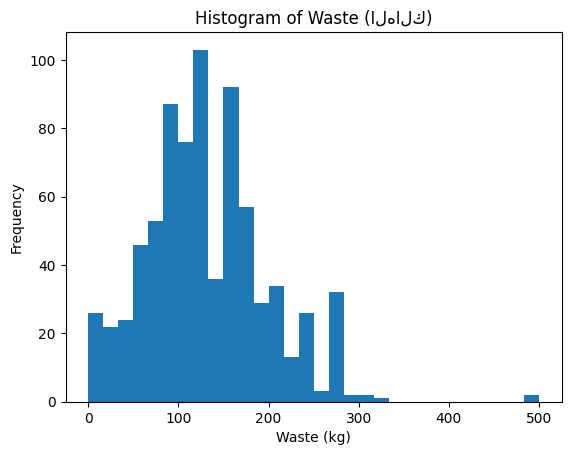

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(df_cleaned['بالكيلو'], bins=30)
plt.title("Histogram of Waste (الهالك)")
plt.xlabel("Waste (kg)")
plt.ylabel("Frequency")
plt.show()


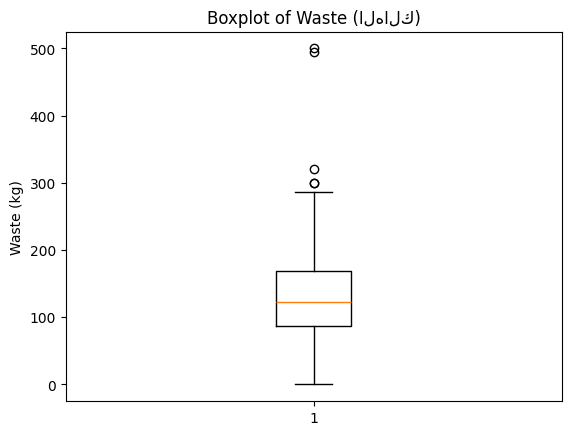

In [ ]:
waste = df_cleaned['بالكيلو']
plt.figure()
plt.boxplot(waste)
plt.title("Boxplot of Waste (الهالك)")
plt.ylabel("Waste (kg)")
plt.show()


In [ ]:
print(waste.describe())


count    766.000000
mean     131.114099
std       67.795866
min        0.000000
25%       87.000000
50%      122.000000
75%      169.500000
max      500.000000
Name: بالكيلو, dtype: float64


In [ ]:
df_cleaned = df_cleaned[waste < 400]


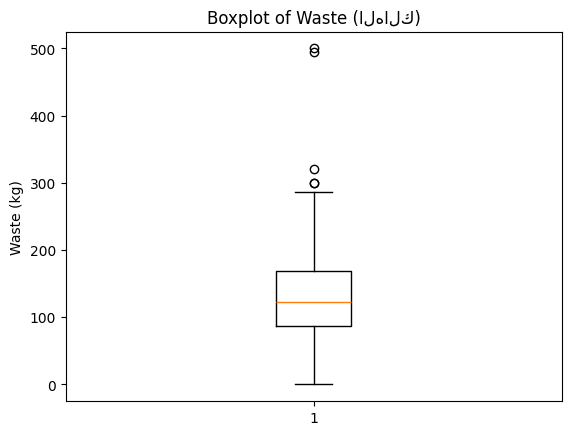

In [ ]:
plt.figure()
plt.boxplot(waste)
plt.title("Boxplot of Waste (الهالك)")
plt.ylabel("Waste (kg)")
plt.show()

In [ ]:
import re
import pandas as pd

# --- 0) (Optional) make sure column names are clean
df_cleaned.columns = df_cleaned.columns.str.strip()


# --- 3) Manual mapping for known variants (extend this as you discover more)
line_map = {

    # تناية variations
    "تناية 1": "تناية1",

    "تناية 2": "تناية2",
    "تناية2":  "تناية2",

    "تناية 3": "تناية3",

    "تناية 4": "تناية4",

    # سليتر variations
    "سليتر 1": "سليتر1",

    "سليتر 2": "سليتر2",

}

df_cleaned["خط الانتاج"] = df_cleaned["خط الانتاج"].replace(line_map)

# --- 4) (Optional) Create numeric id for modeling
# df_cleaned["line_id"] = df_cleaned["خط الانتاج"].astype("category").cat.codes

# --- 5) Quick verification
# print("Unique lines:", df_cleaned["خط الانتاج"].nunique())
# print(df_cleaned["خط الانتاج"].value_counts().head(20))



In [ ]:
df_cleaned["خط الانتاج"].unique(
)

array(['تناية4', 'خط1 الصيني', 'سليتر1', 'تناية2', 'تناية1', 'الخرازة',
       'خط2 الصيني', 'سليتر2', 'تناية3'], dtype=object)

<Figure size 640x480 with 0 Axes>

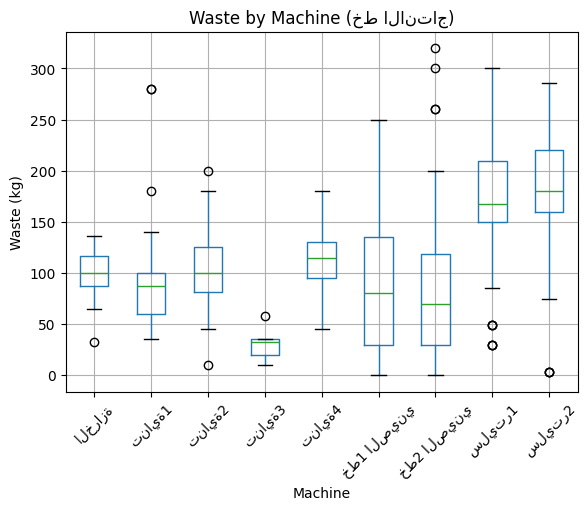

In [ ]:
plt.figure()
df_cleaned.boxplot(column="بالكيلو", by="خط الانتاج")
plt.title("Waste by Machine (خط الانتاج)")
plt.suptitle("")
plt.xlabel("Machine")
plt.ylabel("Waste (kg)")
ax = plt.gca()
labels = [tick.get_text() for tick in ax.get_xticklabels()]
ax.set_xticklabels(fix_arabic_list(labels), rotation=45, ha="right")
plt.show()


###outlier cleaned per machine

In [ ]:
def remove_outliers_per_machine(df):
    cleaned = []

    for machine, group in df.groupby("خط الانتاج"):
        print(f"Processing machine: {(machine)}")
        #display(group)

        Q1 = group["بالكيلو"].quantile(0.25)
        Q3 = group["بالكيلو"].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 0.3 * IQR
        upper = Q3 + 1.5 * IQR

        group_clean = group[
            (group["بالكيلو"] >= lower) &
            (group["بالكيلو"] <= upper)
        ]

        cleaned.append(group_clean)
        #display(cleaned)
    return pd.concat(cleaned)

df_cleaned_machine = remove_outliers_per_machine(df_cleaned)

print("Before:", df_cleaned.shape)
print("After:", df_cleaned_machine.shape)
df_cleaned=df_cleaned_machine

Processing machine: الخرازة
Processing machine: تناية1
Processing machine: تناية2
Processing machine: تناية3
Processing machine: تناية4
Processing machine: خط1 الصيني
Processing machine: خط2 الصيني
Processing machine: سليتر1
Processing machine: سليتر2
Before: (764, 12)
After: (664, 12)


<Figure size 640x480 with 0 Axes>

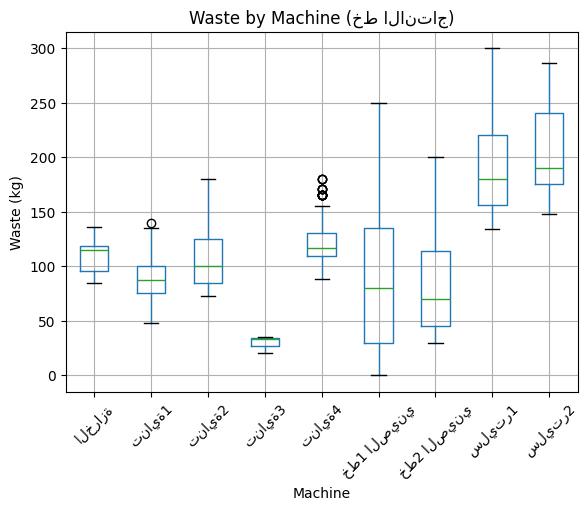

In [ ]:
plt.figure()
df_cleaned.boxplot(column="بالكيلو", by="خط الانتاج")
plt.title("Waste by Machine (خط الانتاج)")
plt.suptitle("")
plt.xlabel("Machine")
plt.ylabel("Waste (kg)")
ax = plt.gca()
labels = [tick.get_text() for tick in ax.get_xticklabels()]
ax.set_xticklabels(fix_arabic_list(labels), rotation=45, ha="right")
plt.show()


In [ ]:
operator_avg = df_cleaned.groupby("الفني")["بالكيلو"].mean().sort_values(ascending=False)

print("Top 5 Operators with Highest Waste:")
print(operator_avg.head(5) , )

Top 5 Operators with Highest Waste:
الفني
محمود حسام الدين          280.000000
محمود حسام / يوسف         270.000000
محمود جمال/ محمد السيد    242.875000
محمودالسيد/محمد السيد     240.000000
على خالد                  224.933333
Name: بالكيلو, dtype: float64


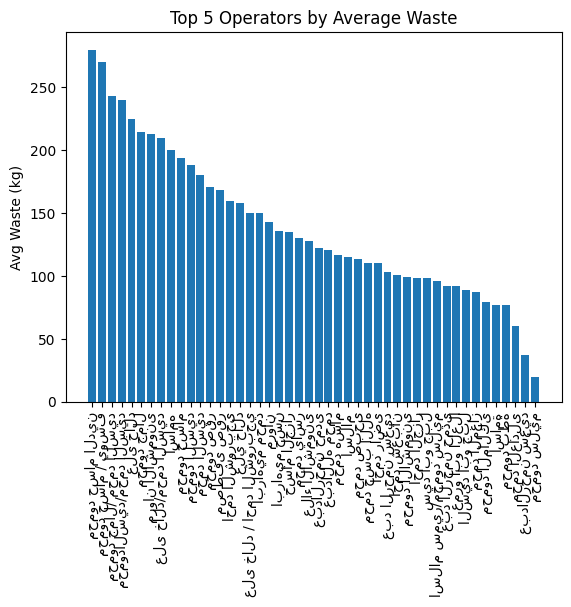

In [ ]:
top5 = operator_avg

top5_labels = fix_arabic_list(top5.index)

plt.figure()
plt.bar(top5_labels, top5.values)
plt.title("Top 5 Operators by Average Waste")
plt.ylabel("Avg Waste (kg)")
plt.xticks(rotation=90)
plt.show()


In [ ]:
machine_avg = (
    df_cleaned.groupby("خط الانتاج")["بالكيلو"]
    .agg(['mean','count'])
    .sort_values(by='mean' ,ascending=False)
)

print(machine_avg)


                  mean  count
خط الانتاج                   
سليتر2      203.479675    123
سليتر1      189.944882    127
تناية4      122.294118    119
الخرازة     110.545455     11
تناية2      108.161111     90
تناية1       88.512987     77
خط2 الصيني   85.232558     43
خط1 الصيني   83.154930     71
تناية3       29.333333      3


In [ ]:
operator_summary = df_cleaned.groupby("الفني")["بالكيلو"].agg(
    avg_waste="mean",
    contribution_count="count"
).sort_values(by="contribution_count", ascending=False)

print(operator_summary.head(15))

                 avg_waste  contribution_count
الفني                                         
محمد صبحى       113.195122                  41
محمود جمال      214.750000                  40
محمد ياسر       130.236842                  38
محمد العادلى     60.312500                  32
احمد راضى       110.096774                  31
محمد هشام       116.483871                  31
على خالد        224.933333                  30
مصطفى صقر       168.392857                  28
محمود حسام      194.107143                  28
سيد ابو جبل      98.096154                  26
محمد المعاز      87.538462                  26
عمرو ابو العلا   91.730769                  26
احمد شعبان      100.520833                  24
محمود صقر       171.083333                  24
محمود المالكى    79.130435                  23


In [ ]:
df_cleaned

2,بالكيلو,الوزن,فرز تاني,محلي,تصدير,السمك,المقاس,الاوردر,الفني,الجوده,خط الانتاج,الورديه
70,95.0,2160.0,2,3,44.0,15,30,1086,محمد صبحى,محمد أشرف,الخرازة,الاولي
108,136.0,1320.0,1,2,133.0,15,35,1086,علاء الاشمونى,محمد أشرف,الخرازة,الثانيه
130,120.0,2420.0,1,3,148.0,15,35,1086,علاء الاشمونى,محمد أشرف,الخرازة,الثانيه
229,136.0,780.0,2,1,132.0,19,45,2003,عبدالله محمد,محمد أشرف,الخرازة,الثانيه
259,85.0,1630.0,1,4,104.0,19,45,2003,محمود الاشمونى,محمد الجوهرى,الخرازة,الاولي
...,...,...,...,...,...,...,...,...,...,...,...,...
843,150.0,3764.0,1,6,2.0,19,91,2006,ابراهيم محمد,طارق سيد,سليتر2,الاولي
844,150.0,3764.0,1,6,2.0,19,85,2006,ابراهيم محمد,طارق سيد,سليتر2,الاولي
845,150.0,3764.0,1,6,2.0,19,95,2006,ابراهيم محمد,طارق سيد,سليتر2,الاولي
857,158.0,1633.0,1,7,72.0,19,48,2007,علي خالد,محمد الجوهري,سليتر2,الثانيه


In [ ]:
# Average waste per Operator + Machine
op_machine = df_cleaned.groupby(
    ["الفني", "خط الانتاج"]
)["بالكيلو"].mean().reset_index()

# Show results
print(op_machine.sort_values("بالكيلو", ascending=False).head(10))


                     الفني خط الانتاج     بالكيلو
68        محمود حسام الدين     سليتر2  280.000000
67       محمود حسام / يوسف     سليتر1  270.000000
34                على خالد     سليتر1  269.666667
64  محمود جمال/ محمد السيد     سليتر1  242.875000
72   محمودالسيد/محمد السيد     سليتر2  240.000000
63              محمود جمال     سليتر2  240.000000
75          مروان الاشمونى     سليتر2  230.000000
37     على خالد/محمد السيد     سليتر2  210.000000
66              محمود حسام     سليتر2  210.000000
41              محمد السيد     سليتر1  210.000000


             الفني خط الانتاج     بالكيلو
73           مروان     سليتر1  142.666667
74  مروان الاشمونى     سليتر1  158.000000
75  مروان الاشمونى     سليتر2  230.000000


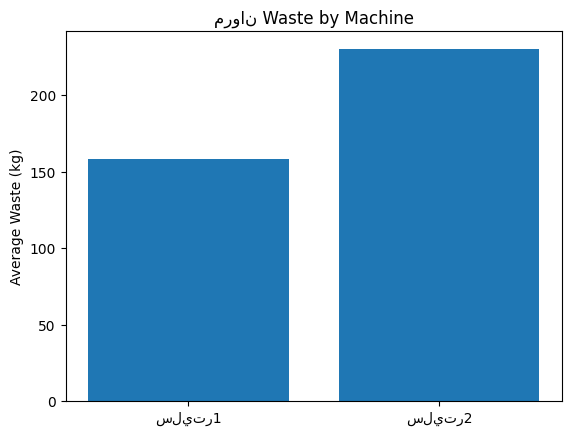

In [ ]:
mrowan_perf = op_machine[op_machine["الفني"].str.contains("مروان")]

print(mrowan_perf)

machine_labels = fix_arabic_list(mrowan_perf["خط الانتاج"])

plt.figure()
plt.bar(machine_labels, mrowan_perf["بالكيلو"])
plt.title(fix_arabic("مروان Waste by Machine"))
plt.ylabel("Average Waste (kg)")
plt.xticks(rotation=45, ha="right")
plt.show()


In [ ]:
df_cleaned["الفني"].unique()

array(['محمد صبحى', 'علاء الاشمونى', 'عبدالله محمد', 'محمود الاشمونى',
       'اسلام سمير/محمود سليم', 'أسامة', 'اسلام', 'احمد الجزار',
       'سيد ابو جبل', 'محمد المعاز', 'محمد ياسر', 'عبدالرحمن حمدى',
       'محمد هشام', 'السيد ابو جبل', 'عبد الرحمن حمدى', 'احمد راضى',
       'احمد شعبان', 'محمود بطة', 'محمد حسب الله', 'محمود سليم',
       'عمرو ابو العلا', 'حسام الجزار', 'محمد العادلى', 'عبد الرحمن سعيد',
       'محمود المالكى', 'ابراهيم حسن', 'عبدالرحمن سعيد', 'على خالد',
       'محمود حسام', 'محمود جمال/ محمد السيد', 'مروان الاشمونى',
       'محمود جمال', 'محمود حسام / يوسف', 'مصطفى صقر', 'محمود السيد',
       'محمود صقر', 'محمد السيد', 'مروان', 'محمودالسيد/محمد السيد',
       'محمود حسام الدين', 'على خالد/محمد السيد', 'اسامه',
       'على خالد / احمد الشوربجي', 'احمد الشوربجى', 'ابراهيم محمد',
       'علي خالد'], dtype=object)

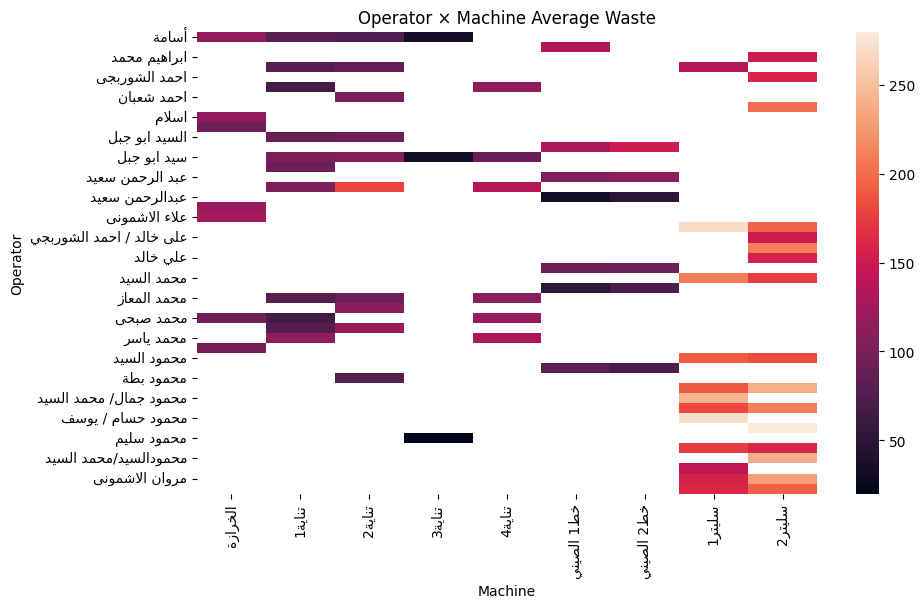

In [ ]:
pivot_table = op_machine.pivot(
    index="الفني",
    columns="خط الانتاج",
    values="بالكيلو"
)

pivot_table.index = pivot_table.index.map(fix_arabic)
pivot_table.columns = pivot_table.columns.map(fix_arabic)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table)
plt.title("Operator × Machine Average Waste")
plt.xlabel("Machine")
plt.ylabel("Operator")
plt.show()


سليتر 2 -> high waste -may need maintenance- not operator issue


### 1) best operator on this Machine



In [ ]:
op_machine_stats = df_cleaned.groupby(
    ["خط الانتاج", "الفني"]
)['بالكيلو'].agg(
    avg_waste="mean",
    count_used="count"
).reset_index()
display(op_machine_stats)
best_machine_per_operator = op_machine_stats.loc[
    op_machine_stats.groupby("خط الانتاج")["avg_waste"].idxmin()
]
display(best_machine_per_operator)
best_per_machine = best_machine_per_operator.sort_values("avg_waste")

# 4) Display results
print(best_machine_per_operator)


,خط الانتاج,الفني,avg_waste,count_used
0,الخرازة,أسامة,115.000000,1
1,الخرازة,اسلام,115.000000,1
2,الخرازة,اسلام سمير/محمود سليم,96.000000,1
3,الخرازة,عبدالله محمد,120.500000,2
4,الخرازة,علاء الاشمونى,128.000000,2
...,...,...,...,...
73,سليتر2,محمود حسام الدين,280.000000,4
74,سليتر2,محمود صقر,160.000000,5
75,سليتر2,محمودالسيد/محمد السيد,240.000000,4
76,سليتر2,مروان الاشمونى,230.000000,13


,خط الانتاج,الفني,avg_waste,count_used
5,الخرازة,محمد صبحى,95.000000,1
15,تناية1,محمد صبحى,66.000000,4
18,تناية2,أسامة,75.000000,1
30,تناية3,محمود سليم,20.000000,1
32,تناية4,سيد ابو جبل,91.000000,4
40,خط1 الصيني,عبدالرحمن سعيد,33.333333,3
46,خط2 الصيني,عبدالرحمن سعيد,50.000000,1
50,سليتر1,احمد الجزار,135.000000,4
62,سليتر2,ابراهيم محمد,150.000000,3


    خط الانتاج           الفني   avg_waste  count_used
5      الخرازة       محمد صبحى   95.000000           1
15      تناية1       محمد صبحى   66.000000           4
18      تناية2           أسامة   75.000000           1
30      تناية3      محمود سليم   20.000000           1
32      تناية4     سيد ابو جبل   91.000000           4
40  خط1 الصيني  عبدالرحمن سعيد   33.333333           3
46  خط2 الصيني  عبدالرحمن سعيد   50.000000           1
50      سليتر1     احمد الجزار  135.000000           4
62      سليتر2    ابراهيم محمد  150.000000           3


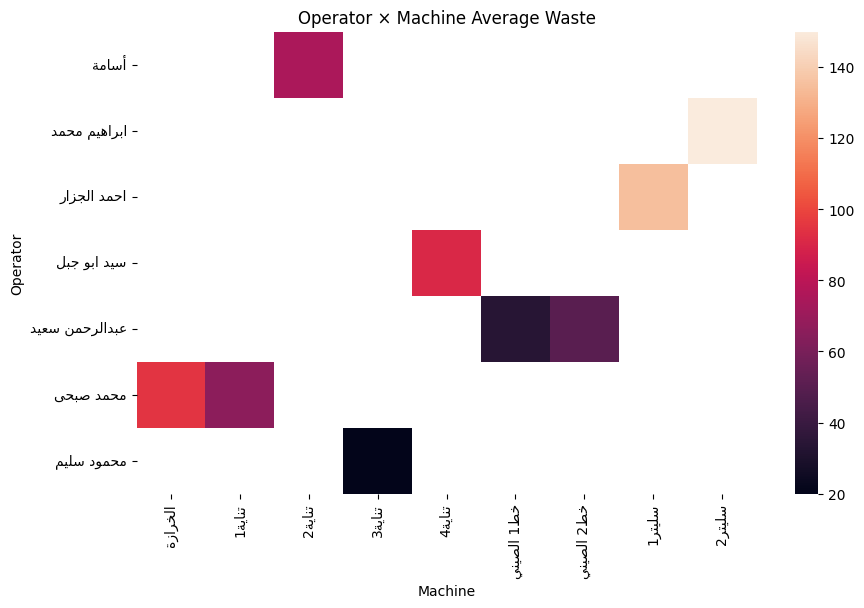

In [ ]:
heatmap_data = best_machine_per_operator.pivot_table(
    index="الفني",
    columns="خط الانتاج",
    values="avg_waste",
    aggfunc="min"
)

heatmap_data.index = heatmap_data.index.map(fix_arabic)
heatmap_data.columns = heatmap_data.columns.map(fix_arabic)

# Plot
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data)
plt.title("Operator × Machine Minimum Average Waste")
plt.xlabel("Machine")
plt.ylabel("Operator")
plt.show()


#preprocessing Done

# feature engineering